#  Projet NexaStore – Nettoyage de Données
## Analyse complète de 4 dimensions de qualité :
### Exhaustivité – Unicité – Validité – Cohérence

Ce notebook vise à produire un jeu de données NexaStore **propre, fiable et exploitable**
selon les 4 dimensions de qualité exigées:
- **Exhaustivité**
- **Unicité**
- **Validité**
- **Cohérence**

L’objectif final est de :

✔ Appliquer les **règles métier NexaStore**  
✔ Répondre aux **histoires d'utilisateurs du CEO, CFO, CMO et CSCO**  
✔ Générer un dataset **conforme aux KPI**  
✔ Respecter les **Definition of Done** du Sprint

Ce notebook est structuré selon les étapes :
**Détection → Documentation → Correction → Vérification**
pour chaque dimension.




## Table des matières
1. [Exhaustivité (Completeness)](#exhaustivite)
2. [Unicité (Uniqueness)](#unicite)
3. [Validité (Validity)](#validite)
4. [Cohérence (Consistency)](#coherence)


In [2]:

# Imports des bibliotheques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('Nexa_Store_Dataset_0.2.csv',encoding="latin1")

print("Shape:", df.shape)
df.head()


Shape: (51229, 28)


C:\Users\USER\AppData\Local\Temp\ipykernel_16648\2885887894.py:7: DtypeWarning: Columns (18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Nexa_Store_Dataset_0.2.csv',encoding="latin1")


,ID de ligne,ID de commande,DaTe de commande,Date dexpedition,Mode dexpedition,iD client,Nom du client,Segment de marche,Ville,Etat / province,...,Ventes,Quantite,remise,Profit,Cout dexpedition,Priorite de la commande,Sous-categorie.1,Nom du Produit.1,Unnamed: 26,Source de la commande
0,45271,TZ-2014-6820,06-11-2024,08-11-2024,Premiere classe,LT-7110,Liz Thompson,Client particulier,Mwanza,Mwanza,...,"84,3",-2,0.0,27.78,7.93,Moyen,Accessoires,"Belkin Flash Drive, USB",NaN,en ligne
1,45637,SG-2014-4440,09-10-2024,10-10-2014,Premiere classe,GH-4425,Gary Hwang,Client particulier,Dakar,Dakar,...,81.69,1,0.0,4.89,16.18,Critique,Accessoires,"Belkin Keyboard, Erganomic",NaN,en ligne
2,45638,SG-2014-4440,09-10-2024,10-10-2024,Premiere classe,GH-4425,Gary Hwang,Client particulier,Dakar,Dakar,...,58.83,1,0.0,"6,45",14.62,Critique,Accessoires,"Enermax Numeric Keypad, Erganomic",NaN,en ligne
3,45945,CG-2013-2440,06-11-2023,08-11-2023,Premiere classe,EJ-3720,Ed Jacobs,Client particulier,Kisangani,Orientale,...,29.28,1,0.0,13.17,"2,92",Moyen,Accessoires,"Logitech Mouse, Bluetooth",NaN,en ligne
4,46149,EG-2014-5980,19-09-2024,20-09-2024,Premiere classe,CR-2730,Craig Reiter,Client particulier,Cairo,Al Qahirah,...,415.08,4,0.0,58.08,122.41,Eleve,Accessoires,"Memorex Memory Card, Programmable",NaN,en ligne


## 1) Exhaustivité <a id='exhaustivite'></a>


### a) Détection
- Taux de complétude par colonne
- Valeurs nulles vs non nulles


,taux_completude_%
Unnamed: 26,0.00
Code postal,19.52
ID de ligne,100.00
Nom du Produit.1,100.00
Sous-categorie.1,100.00
Priorite de la commande,100.00
Cout dexpedition,100.00
Profit,100.00
remise,100.00
Quantite,100.00


c:\Users\USER\anaconda3\envs\collecte_nettoyage_donnees\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


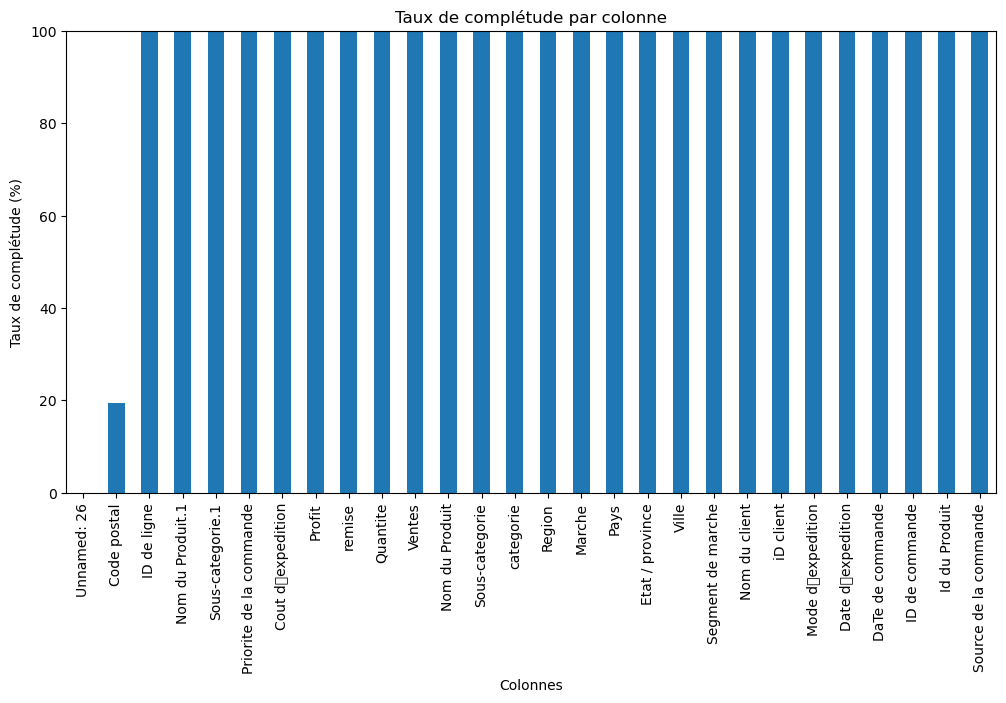

In [3]:
df_exh = df.copy()

# Taux de complétude par colonne
completeness = (df_exh.notna().mean().sort_values(ascending=True)*100).round(2) 
display(completeness.to_frame("taux_completude_%"))

#visualisation du taux de complétude
completeness.plot(kind='bar', figsize=(12,6))
plt.title('Taux de complétude par colonne')
plt.ylabel('Taux de complétude (%)')
plt.xlabel('Colonnes')
plt.ylim(0, 100)
plt.show()




# Documentation – Exhaustivité

### Résultats observés :
- La colonne `Unnamed: 26` présente **0 % de complétude** → colonne vide → aucune valeur métier.
- La colonne `Code postal` a ~**19 %** de valeurs inconnues.
  Cependant, **aucune histoire d’utilisateur** du CEO / CFO / CMO / CSCO ne demande une analyse par code postal.


### c) Correction:
- La colonne `Code postal` est considérée **non essentielle** pour l’analyse des KPI.
- la colonne est **supprimée** pour éviter de polluer le dataset.
- Les colonnes essentielles (ID de ligne, ID de commande, dates, ventes, quantite, remise, etc.)
doivent atteindre **100% de complétude**.


In [4]:

# Supprimer la colonne "Unnamed: 26" car elle est complètement vide
df_exh.drop(columns=["Unnamed: 26"], inplace=True, errors='ignore')

# Suppresion de la colone "Code postal" car non essentielle
df_exh.drop(columns=["Code postal"], inplace=True, errors='ignore')


print("Imputation terminée.")


Imputation terminée.



### d) Vérification
- Recalculer les NA et montrer la baisse
- Aucun NA dans les colonnes imputées


In [5]:

# Taux de complétude par colonne
completeness = df_exh.notna().mean().sort_values(ascending=True)*100 
display(completeness.to_frame("taux_completude_%"))



,taux_completude_%
ID de ligne,100.0
Sous-categorie.1,100.0
Priorite de la commande,100.0
Cout dexpedition,100.0
Profit,100.0
remise,100.0
Quantite,100.0
Ventes,100.0
Nom du Produit,100.0
Sous-categorie,100.0


## 2) Unicité  <a id='unicite'></a>


### a) Détection
- Doublons **lignes**
- Doublons **colonnes** (même nom) et **redondances** (noms différents mais mêmes valeurs)
- Doublons des **cles primaires** Id de ligne


In [6]:

# Lignes dupliquées
df_dup = df_exh.duplicated(keep='first')
print("Nombre de lignes dupliquées:", df_dup.sum())

#Identification des doublons dans la colonne "ID de ligne "
dup_id = df_exh["ID de ligne"].duplicated(keep=False)
print("\n Lignes concernées par un ID de ligne dupliqué :", dup_id.sum())

df_exh[dup_id].sort_values("ID de ligne").head()


# Afficher quelques doublons
display(df_exh[df_dup].head())

# Colonnes dupliquées par NOM
duplicated_names = df_exh.columns[df_exh.columns.duplicated()]
print("\nColonnes dupliquées par nom:", list(duplicated_names))

# Colonnes redondantes
redondantes = []
cols = list(df_exh.columns)
for i, c1 in enumerate(cols):
    for c2 in cols[i+1:]:
        try:
            if df_exh[c1].equals(df_exh[c2]):
                redondantes.append((c1, c2))
        except Exception:
            pass
print("Paires de colonnes *strictement* identiques:", redondantes)






Nombre de lignes dupliquées: 8

 Lignes concernées par un ID de ligne dupliqué : 84


,ID de ligne,ID de commande,DaTe de commande,Date dexpedition,Mode dexpedition,iD client,Nom du client,Segment de marche,Ville,Etat / province,...,Nom du Produit,Ventes,Quantite,remise,Profit,Cout dexpedition,Priorite de la commande,Sous-categorie.1,Nom du Produit.1,Source de la commande
51187,38442,US-2014-141558,12-03-2024,17-03-2024,Classe standard,MH-17290,Marc Harrigan,Petite entreprise,Philadelphia,Pennsylvania,...,KI Adjustable-Height Table,154.764,3,0.4,-46.4292,7.41,Moyen,Tables,KI Adjustable-Height Table,en ligne
51188,38998,CA-2014-151799,15-12-2024,19-12-2024,Classe standard,BF-11170,Ben Ferrer,Petite entreprise,Lawrence,Massachusetts,...,Bretford Rectangular Conference Table Tops,526.582,2,0.3,-52.6582,75.37,Eleve,Tables,Bretford Rectangular Conference Table Tops,en ligne
51189,39465,CA-2014-107174,07-11-2024,14-11-2024,Classe standard,AB-10060,Adam Bellavance,Petite entreprise,Seattle,Washington,...,Hon 5100 Series Wood Tables,2036.86,7,0.0,366.6348,524.76,Faible,Tables,Hon 5100 Series Wood Tables,en ligne
51190,40584,CA-2014-154011,20-06-2024,27-06-2024,Classe standard,DB-13270,Deborah Brumfield,Petite entreprise,Dallas,Texas,...,Chromcraft Bull-Nose Wood Round Conference Tab...,457.485,3,0.3,-84.9615,50.88,Moyen,Tables,Chromcraft Bull-Nose Wood Round Conference Tab...,en ligne
51191,41196,US-2011-117380,28-03-2021,03-04-2021,Classe standard,MP-18175,Mike Pelletier,Petite entreprise,Springfield,Ohio,...,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-330.588,1,0.4,-143.2548,9.4,Moyen,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,en ligne



Colonnes dupliquées par nom: []
Paires de colonnes *strictement* identiques: [('Sous-categorie', 'Sous-categorie.1'), ('Nom du Produit', 'Nom du Produit.1')]



### b) Documentation – Unicité

### Résultats :
✔ **8 lignes** sont des **doublons complets** → lignes strictement identiques.

✔ **84 lignes** présentent un `ID de ligne` dupliqué → 42 paires.

### Analyse métier :
Selon les histoires d’utilisateurs et les besoins du CFO/CEO :

✔ `ID de ligne` représente une **transaction unique**.

✔ Un doublon complet = **double comptabilisation**
  Ceci fausse les ventes, profits, quantités, KPI.


### c) Correction:
✔ Identifier et supprimer les doublons complets  
✔ Poser `ID de ligne` comme **clé primaire**  
✔ Conserver uniquement la **première occurrence** de chaque transaction  
✔ Supprimer les **colonnes redondantes** :
  - `Sous-categorie.1`
  - `Nom du Produit.1`


In [7]:
# Suppression des doublons dans "ID de ligne" et doublons des lignes
df_uni = df_exh.drop_duplicates(subset=["ID de ligne"], keep="first").copy()

# Colonnes redondantes
df_uni = df_uni.drop(columns=["Sous-categorie.1", "Nom du Produit.1"], errors="ignore")

print("Nombre de lignes avant nettoyage :", len(df_exh))
print("Nombre de lignes après nettoyage  :", len(df_uni))
print("Lignes supprimées                 :", len(df_exh) - len(df_uni))



Nombre de lignes avant nettoyage : 51229
Nombre de lignes après nettoyage  : 51187
Lignes supprimées                 : 42



### d) Vérification
✔ Compter de nouveau doublons lignes/colonnes


In [8]:
print("Doublons complets restants :", df_uni.duplicated().sum())
print("ID de ligne non uniques :", df_uni["ID de ligne"].duplicated().sum())


Doublons complets restants : 0
ID de ligne non uniques : 0


## 3) Validité <a id='validite'></a>


### a) Détection


In [9]:
df_val = df_uni.copy()

#Affichage des types de données
df_val.dtypes


ID de ligne                  int64
ID de commande              object
DaTe de commande            object
Date dexpedition           object
Mode dexpedition           object
iD client                   object
Nom du client               object
Segment de marche           object
Ville                       object
Etat / province             object
Pays                        object
Marche                      object
Region                      object
Id du Produit               object
categorie                   object
Sous-categorie              object
Nom du Produit              object
Ventes                      object
Quantite                     int64
remise                     float64
Profit                      object
Cout dexpedition           object
Priorite de la commande     object
Source de la commande       object
dtype: object

In [10]:
# Detection des anomalies des nom des colonnes
print(df_val.columns)

Index(['ID de ligne', 'ID de commande', 'DaTe de commande',
       'Date dexpedition', 'Mode dexpedition', 'iD client', 'Nom du client',
       'Segment de marche', 'Ville', 'Etat / province', 'Pays', 'Marche',
       'Region', 'Id du Produit', 'categorie', 'Sous-categorie',
       'Nom du Produit', 'Ventes', 'Quantite', 'remise', 'Profit',
       'Cout dexpedition', 'Priorite de la commande',
       'Source de la commande'],
      dtype='object')


In [11]:
#Detection des anomalies des regles metiers sur la colonne remise
df_val["remise"].value_counts().sort_values()

remise
0.850        2
1.700        6
0.550       10
0.570       12
0.650       17
0.602       23
0.320       27
0.202       41
0.370       74
0.402      104
0.350      122
0.070      150
0.250      198
0.800      316
0.450      327
0.300      340
0.270      388
0.002      461
0.150      541
0.470      725
0.170      735
0.500     1633
0.700     1780
0.600     2006
0.400     3177
0.100     4068
0.200     4998
0.000    28906
Name: count, dtype: int64


### b) Documentation – Validité

### Problèmes identifiés :
✔ Noms de colonnes non normalisés (accents, espaces, majuscules).

✔ Types incohérents (`object` pour des nombres).

✔ Règles métier non respectées :

  - `remise` peut dépasser 1 (ex: 1.7 → doit devenir 0.7)
  - `ventes`, `quantite`, `cout_dexpedition` peuvent être négatifs
  - Dates incohérentes : date expédition < date commande





### c) Correction

✔ Noms de colonnes → snake_case  
✔ Types numériques et dates correctement convertis  
✔ Règles métier corrigées :
  - remise ∈ [0,1]
  - montants positifs


✔ Normalisation des noms

In [12]:
# Nettoyage + normalisation complète des noms de colonnes

df_val.columns = (
    df_val.columns
        .str.strip()
        .str.lower()
        .str.normalize("NFKD")
        .str.encode("ascii", errors="ignore")
        .str.decode("utf-8")
        .str.replace("-", " ")          # ----- 1) normaliser les séparateurs
        .str.replace(".", " ")
        .str.replace("/", " ")
        .str.replace("\\", " ")
        .str.replace("’", " ")
        .str.replace("'", " ")
        .str.replace("  ", " ")         # ----- 2) réduire espaces multiples
        .str.replace("  ", " ")
        .str.replace(" ", "_")          # ----- 3) transformer les espaces restants
)


print("Noms de colonnes normalisés :\n ")
print(df_val.columns)


print("\nNoms de colonnes normalisés (aperçu):", df_val.columns[:10])


Noms de colonnes normalisés :
 
Index(['id_de_ligne', 'id_de_commande', 'date_de_commande', 'date_dexpedition',
       'mode_dexpedition', 'id_client', 'nom_du_client', 'segment_de_marche',
       'ville', 'etat_province', 'pays', 'marche', 'region', 'id_du_produit',
       'categorie', 'sous_categorie', 'nom_du_produit', 'ventes', 'quantite',
       'remise', 'profit', 'cout_dexpedition', 'priorite_de_la_commande',
       'source_de_la_commande'],
      dtype='object')

Noms de colonnes normalisés (aperçu): Index(['id_de_ligne', 'id_de_commande', 'date_de_commande', 'date_dexpedition',
       'mode_dexpedition', 'id_client', 'nom_du_client', 'segment_de_marche',
       'ville', 'etat_province'],
      dtype='object')


✔ Conversion des dates

In [13]:
# Conversion des dates
for c in df_val.columns:
    if c.startswith("date_") or c.endswith("_date"):
        df_val[c] = pd.to_datetime(df_val[c], format="%d-%m-%Y", errors="coerce")
        print(f"Conversion de la colonne {c} en datetime effectuée.")
        

Conversion de la colonne date_de_commande en datetime effectuée.
Conversion de la colonne date_dexpedition en datetime effectuée.


In [14]:
#Typage de toutes les autres colonnes
df_val = df_val.convert_dtypes()

✔ Correction des règles métier

In [15]:
# Remise
r = df_val["remise"].astype(str).str.replace(",", ".", regex=False)
r = pd.to_numeric(r, errors="coerce")
mask_bad = r > 1
r.loc[mask_bad] = (r.loc[mask_bad] % 1).round(4)
df_val["remise"] = r

# Montants positifs
for c in ["ventes", "quantite", "cout_dexpedition"]:
    if c in df_val.columns:
        x = df_val[c].astype(str).str.replace(",", ".", regex=False)
        x = pd.to_numeric(x, errors="coerce").abs()
        df_val[c] = x



### d) Vérification
- Assertions règles métier


In [16]:

assert (df_val["remise"].between(0,1) | df_val["remise"].isna()).all()
assert (df_val["ventes"] >= 0).all()
assert (df_val["quantite"] >= 0).all()
assert (df_val["cout_dexpedition"] >= 0).all()

print("✔ Toutes les règles de Validité sont satisfaites")



✔ Toutes les règles de Validité sont satisfaites


## 4) Cohérence <a id='coherence'></a>


### a) Détection
- **Intra-colonne** : normalisation sémantique (casse, espaces, mapping des variantes)
- **Inter-colonnes** : dépendances logiques (ex. dérivations de montants; dates de commande/expédition; relations taux ↔ compteurs)


In [17]:
df_dates = df_val.copy()

# Calcule du délai
df_dates["delai_jours"] = (
    df_dates["date_dexpedition"] - df_dates["date_de_commande"]
).dt.days

# --- Condition 1 : expédition < commande ---
anomalie_type1 = df_dates[df_dates["delai_jours"] < 0]

print("Anomalies Type 1 (expédition avant commande) :", len(anomalie_type1))


# --- Condition 2 : mode 'meme_jour' mais dates différentes ---
mask_meme_jour = df_dates["mode_dexpedition"] == "Meme jour"
anomalie_type2 = df_dates[
    mask_meme_jour & (df_dates["date_dexpedition"] != df_dates["date_de_commande"])
]

print("Anomalies Type 2 (même jour mais dates différentes) :", len(anomalie_type2))

anomalie_type2.head()


Anomalies Type 1 (expédition avant commande) : 7
Anomalies Type 2 (même jour mais dates différentes) : 115


,id_de_ligne,id_de_commande,date_de_commande,date_dexpedition,mode_dexpedition,id_client,nom_du_client,segment_de_marche,ville,etat_province,...,sous_categorie,nom_du_produit,ventes,quantite,remise,profit,cout_dexpedition,priorite_de_la_commande,source_de_la_commande,delai_jours
17,42308,CG-2012-4890,2022-05-26,2022-05-29,Meme jour,JH-5430,Jennifer Halladay,Client particulier,Kinshasa,Kinshasa,...,Accessoires,"Logitech Flash Drive, Erganomic",28.32,1,0.0,12.72,5.92,Eleve,en ligne,3.0
23,46292,GH-2012-2720,2022-12-24,2022-12-26,Meme jour,DC-3285,Debra Catini,Client particulier,Tamale,Northern,...,Accessoires,"SanDisk Memory Card, Programmable",113.91,1,0.0,11.37,11.77,Moyen,en ligne,2.0
973,42870,RS-2014-2900,2024-09-24,2024-09-25,Meme jour,RW-9690,Robert Waldorf,Client particulier,Usol'ye-Sibirskoye,Irkutsk,...,Accessoires,"SanDisk Flash Drive, Erganomic",74.70,2,0.0,1.44,5.15,Eleve,en ligne,1.0
975,44641,UP-2013-710,2023-08-02,2023-08-03,Meme jour,DO-3435,Denny Ordway,Client particulier,Cherkasy,Cherkasy,...,Accessoires,"Belkin Router, Programmable",260.25,1,0.0,114.51,41.53,Eleve,en ligne,1.0
1153,44434,UP-2014-7220,2024-07-11,2024-07-12,Meme jour,JK-5640,Jim Kriz,Petite entreprise,Kryvyy Rih,Dnipropetrovs'k,...,Accessoires,"Memorex Flash Drive, USB",29.61,1,0.0,2.64,2.72,Moyen,en ligne,1.0


### b) Documentation – Validité


- **Détection et correction des incohérences inter-colonnes**

Une incohérence logique a été identifiée entre les colonnes  date_de_commande et date_dexpedition.Dans plusieurs lignes, la date d’expédition était antérieure à la date de commande, ce qui viole les règles métier.
On constate egalement que pour certaines lignes le mode de livraison est “meme_jour” mais les dates d'expedition et de commande sont différentes

- **Détection des incohérences intra-colonnes**

Plusieurs colonnes textuelles dans le jeu de données NexaStore présentaient des incohérences structurelles et sémantiques : variation de casse, accents, orthographe approximative, abréviations, doublons conceptuels (ex. APAC vs Asie Pacifique), etc.
Ces incohérences empêchent la consolidation correcte des KPIs (ventes par marché, distribution par région, performance par segment de clientèle…).


### c) Correction

### Intra-colonnes :
✔ Nettoyage des chaînes de caracteres (espaces, minuscules, accents) et mapping

### Inter-colonnes :
- `date_dexpedition` doit être ≥ `date_de_commande`, si non permuter les dates
- Mode “meme_jour” → délai = 0

- Correction intra-colonnes

In [ ]:
# Copie de travail
df_clean = df_val.copy()

# =====================================================================
# NORMALISATION + MAPPING GLOBAL
# =====================================================================

import unidecode
import pycountry

df_clean = df_val.copy()

# -------------------------------------------------------------
# 1) Fonction de normalisation générique de tout texte
# -------------------------------------------------------------
def normalize(s):
    if pd.isna(s):
        return s
    s = str(s).lower().strip()
    s = unidecode.unidecode(s)              # enlever accents
    s = s.replace("-", " ").replace("_", " ")
    s = " ".join(s.split())                 # enlever espaces multiples
    return s

# Normalisation sur toutes les colonnes string
for col in df_clean.select_dtypes(include="string"):
    df_clean[col] = df_clean[col].apply(normalize)


# -------------------------------------------------------------
# 2) MAPPING GLOBAL (fusion de tous les mappings)
# -------------------------------------------------------------
mapping_global = {

    # ----------------- Mode d’expédition -----------------
    "classe standard": "standard",
    "classestandard": "standard",
    "express": "express",
    "express same day": "meme_jour",
    "meme jour": "meme_jour",

    # ----------------- Segment de marché -----------------
    "client particulier": "particulier",
    "particuliers": "particulier",
    "petite entreprise": "petite_entreprise",
    "petit entreprise": "petite_entreprise",
    "entreprise": "entreprise",
    "entreprises": "entreprise",

    # ----------------- Priorité -----------------
    "moyen": "moyen",
    "moyenne": "moyen",
    "eleve": "eleve",
    "elevee": "eleve",
    "faible": "faible",

    # ----------------- Catégories -----------------
    "fourniture bureau": "fournitures_de_bureau",
    "fournitures bureau": "fournitures_de_bureau",
    "mobilier": "mobilier",
    "meuble": "mobilier",
    "mobiliers": "mobilier",
    "techno": "technologie",

    # ----------------- Source de commande -----------------
    "online": "en_ligne",
    "on line": "en_ligne",
    "en ligne": "en_ligne",
    "en  ligne": "en_ligne",

    # ----------------- Pays / Régions spécifiques -----------------
    "usa": "etats_unis",
    "us": "etats_unis",
    "etats unis": "etats_unis",
    "ile de france": "ile_de_france",
    "ile de la france": "ile_de_france",
    "ile-de-france": "ile_de_france",

    # ----------------- Marché (fusion conceptuelle) -----------------
    "apac": "asie_pacifique",
    "asie pacifique": "asie_pacifique",
    "latam": "amerique_latine",
    "amerique latine": "amerique_latine",
    "emea": "europe_moyen_orient_afrique",
    "europe moyen-orient et afrique": "europe_moyen_orient_afrique",
    "eu": "europe",
    "canada": "canada",

    # ----------------- Régions -----------------
    "centre asie": "asie_centrale",
    "nord asie": "asie_nord",
    "sudest asie": "asie_sud_est"
}

# -------------------------------------------------------------
# 3) Application automatique du mapping
# -------------------------------------------------------------
for col in df_clean.select_dtypes(include="string"):
    df_clean[col] = df_clean[col].replace(mapping_global)


# -------------------------------------------------------------
# 4) Correction automatique des pays via pycountry
# -------------------------------------------------------------
def clean_country(c):
    if pd.isna(c):
        return c
    try:
        return pycountry.countries.lookup(c).name
    except:
        return c

if "pays" in df_clean.columns:
    df_clean["pays"] = df_clean["pays"].apply(clean_country)




- Correction inter-colonnes

In [19]:
# =====================================================================
df_dates["date_de_commande_corr"] = df_dates["date_de_commande"]
df_dates["date_dexpedition_corr"] = df_dates["date_dexpedition"]

# --- Correction Type 1 : inversion des dates ---
mask_t1 = df_dates["delai_jours"] < 0

df_dates.loc[mask_t1, ["date_de_commande_corr", "date_dexpedition_corr"]] = \
    df_dates.loc[mask_t1, ["date_dexpedition", "date_de_commande"]].values


# --- Correction Type 2 : mode 'meme_jour' ---
mask_t2 = (df_dates["mode_dexpedition"] == "meme_jour") & \
          (df_dates["date_de_commande_corr"] != df_dates["date_dexpedition_corr"])

df_dates.loc[mask_t2, "date_dexpedition_corr"] = \
    df_dates.loc[mask_t2, "date_de_commande_corr"]



### d) Vérification

In [20]:
# -------------------------------------------------------------
#  Vérification des corrections apportées
# -------------------------------------------------------------
print("Vérification des colonnes après normalisation :\n")
cols_test = ["mode_dexpedition", "segment_de_marche", "priorite", 
             "categorie", "sourcedelacommande", "marche", "region"]

for col in cols_test:
    if col in df_clean.columns:
        print(f"\n--- {col} ---")
        print(df_clean[col].value_counts())

Vérification des colonnes après normalisation :


--- mode_dexpedition ---
mode_dexpedition
classe standard    30713
deuxieme classe    10290
premiere classe     7488
meme jour           2696
Name: count, dtype: int64

--- segment_de_marche ---
segment_de_marche
client particulier    26469
entreprise            15391
petite entreprise      9327
Name: count, dtype: int64

--- categorie ---
categorie
fournitures de bureau    31203
technologie              10106
mobilier                  9864
technlogie                  11
fournitures de buro          3
Name: count, dtype: int64

--- marche ---
marche
apac                              10992
latam                             10286
eu                                10000
us                                 9994
emea                               4912
afrique                            4587
canada                              384
europe moyen orient et afrique       14
asie pacifique                       10
amerique latine                   

In [21]:
# Recalcul du délai corrigé
df_dates["delai_corr_jours"] = (
    df_dates["date_dexpedition_corr"] - df_dates["date_de_commande_corr"]
).dt.days

# Vérification règle 1
print("Anomalies restantes (expédition < commande) :",
      (df_dates["delai_corr_jours"] < 0).sum())

# Vérification règle 2
print("Anomalies restantes (même jour mais dates ≠) :",
      df_dates[
          (df_dates["mode_dexpedition"] == "meme_jour") &
          (df_dates["delai_corr_jours"] != 0)
      ].shape[0])


Anomalies restantes (expédition < commande) : 0
Anomalies restantes (même jour mais dates ≠) : 0
